
---
# **------Lab Report 03-----**
## **Name   : Muhammad Ehtisham Saleem**
## **Reg No : B22F1242AI108**
## **Lab : Artificial Neural Network**
## **Submitted To : Mam Ammara Irfan**
## **Course Instructor : Dr Arshad Iqbal**
---

---



# **Lab Task: Neural Network with Different Activation Functions**
# **Introduction:**
>**In this lab task, I build a neural network model using different activation functions, including Sigmoid, Tanh, and ReLU. I train each model separately to observe how each activation function impacts training performance, accuracy, and convergence speed. After training, I compare the models by analyzing their validation accuracy and loss. To better understand their differences, I visualize the results using plots that show accuracy and loss trends over multiple epochs. Through this process, I gain insights into how activation functions affect neural network learning and which one performs best for the given dataset.**


Cover:
1. Building a neural network model using three different activation functions: Sigmoid, Tanh, and ReLU.
2. Training each model separately and analyzing how activation functions impact model performance.
3. Comparing accuracy and training time for each activation function.
4. Plotting accuracy and loss to visualize the differences between the activation functions.
5. Summarizing findings to determine the best activation function for this classification problem.









## **Required Libraries**
**Before implementing the neural network, I import the necessary Python libraries:**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


## **Explanation:**
* numpy → Used for numerical operations.
* tensorflow → Used for building and training the neural network.
* matplotlib.pyplot → Used for visualization.
* time → Used for measuring training time.
* Sequential → A linear stack of layers for building models.
* Dense → A fully connected layer for the neural network.
* mnist → The dataset used for training and testing.
* to_categorical → Converts labels into a one-hot encoded format.

## **Step 1: Load and Preprocess the Data**


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255) to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten 28x28 images into 1D vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Explanation:**
* The MNIST dataset consists of handwritten digit images (0-9).
* The images are grayscale and have a size of 28x28 pixels.
* We normalize the pixel values between 0 and 1 to speed up training.
* We flatten each image into a vector of 784 elements to use in our neural network.
* We convert the labels into a one-hot encoded format since we have 10 classes (digits 0-9).


## **Step 2: Define the Model Function**

In [ ]:
def create_model(activation_function):
    model = Sequential([
        Dense(128, activation=activation_function, input_shape=(784,)),  # First hidden layer
        Dense(64, activation=activation_function),  # Second hidden layer
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


## **Explanation:**
* We use a fully connected (Dense) network with three layers:
 * First hidden layer: 128 neurons, uses the given activation function.
 * Second hidden layer: 64 neurons, uses the given activation function.
 * Output layer: 10 neurons (one for each digit), uses the softmax activation function.
* Softm\ax activation is used in the output layer to classify digits into probability distributions.
* Adam optimizer is used for efficient training.
* Categorical cross-entropy is used as the loss function for multi-class classification.

## **Step 3: Train and Evaluate Models with Different Activation Functions**
We will train three models separately using different activation functions: Sigmoid, Tanh, and ReLU. We will also measure training time and accuracy for comparison.

## **Sigmoid Activation Model**

In [ ]:
# Create the model with Sigmoid activation
sigmoid_model = create_model('sigmoid')
# Train the model
start_time = time.time()
history_sigmoid = sigmoid_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
end_time = time.time()
# Calculate training time
sigmoid_training_time = end_time - start_time


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7861 - loss: 0.8410 - val_accuracy: 0.9375 - val_loss: 0.2217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9438 - loss: 0.1905 - val_accuracy: 0.9568 - val_loss: 0.1439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9615 - loss: 0.1280 - val_accuracy: 0.9631 - val_loss: 0.1195
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9721 - loss: 0.0957 - val_accuracy: 0.9701 - val_loss: 0.0968
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9797 - loss: 0.0729 - val_accuracy: 0.9731 - val_loss: 0.0851
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9837 - loss: 0.0556 - val_accuracy: 0.9751 - val_loss: 0.0794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9868 - loss: 0.0458 - val_accuracy: 0.9765 - val_loss: 0.0757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9909 - loss: 0.033

## **Explanation:**

* We create a neural network where both hidden layers use the Sigmoid activation function.
* The training starts, and we record the start time.
* After training, we record the end time and calculate how long the training took.

## **Tanh Activation Model**

In [ ]:
# Create the model with Tanh activation
tanh_model = create_model('tanh')
# Train the model
start_time = time.time()
history_tanh = tanh_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
end_time = time.time()
# Calculate training time
tanh_training_time = end_time - start_time


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8729 - loss: 0.4353 - val_accuracy: 0.9570 - val_loss: 0.1468
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9617 - loss: 0.1277 - val_accuracy: 0.9643 - val_loss: 0.1114
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0761 - val_accuracy: 0.9727 - val_loss: 0.0846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9754 - val_loss: 0.0784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9738 - val_loss: 0.0883
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9902 - loss: 0.0324 - val_accuracy: 0.9738 - val_loss: 0.0839
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9708 - val_loss: 0.1041
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9928 - loss: 0.0

## **Explanation:**

* This model uses Tanh activation function in both hidden layers.
* The training process is similar to the Sigmoid model.
* The training time is recorded for comparison.

## **ReLU Activation Model**

In [ ]:
# Create the model with ReLU activation
relu_model = create_model('relu')
# Train the model
start_time = time.time()
history_relu = relu_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
end_time = time.time()
# Calculate training time
relu_training_time = end_time - start_time


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8838 - loss: 0.4076 - val_accuracy: 0.9637 - val_loss: 0.1211
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9687 - loss: 0.1036 - val_accuracy: 0.9723 - val_loss: 0.0908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0718 - val_accuracy: 0.9750 - val_loss: 0.0861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.9771 - val_loss: 0.0764
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0.9702 - val_loss: 0.1005
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9784 - val_loss: 0.0807
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9935 - loss: 0.02

## **Explanation:**

* This model uses ReLU activation function, which is widely used in deep learning due to its efficiency.
* The same process is followed as in the previous two models.
* The training time is recorded to see which activation function is the fastest.

## **Step 4: Compare Training Time**

In [ ]:
print(f"Training Time (Sigmoid): {sigmoid_training_time:.2f} seconds")
print(f"Training Time (Tanh): {tanh_training_time:.2f} seconds")
print(f"Training Time (ReLU): {relu_training_time:.2f} seconds")


Training Time (Sigmoid): 97.87 seconds
Training Time (Tanh): 103.33 seconds
Training Time (ReLU): 97.67 seconds


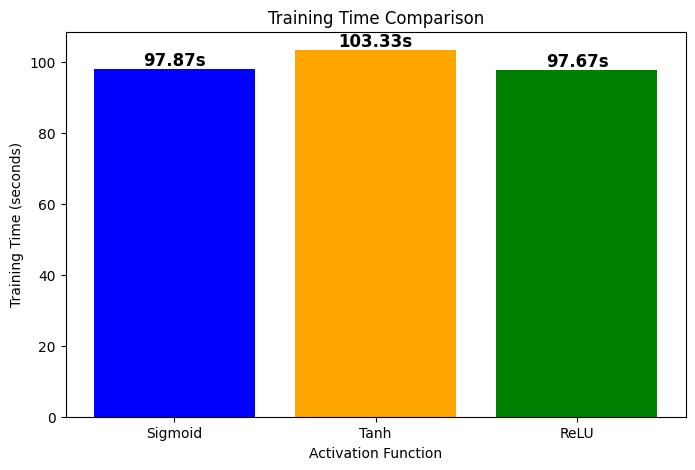

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(["Sigmoid", "Tanh", "ReLU"], comparison_df["Training Time (seconds)"], color=['blue', 'orange', 'green'])
# Add time labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}s",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Activation Function")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.show()


# **Explanation:**

* This prints how long each model took to train.
* ReLU is expected to be the fastest because it avoids vanishing gradient issues that slow down learning in Sigmoid and Tanh.

## **Step 5: Plot Accuracy Comparison**

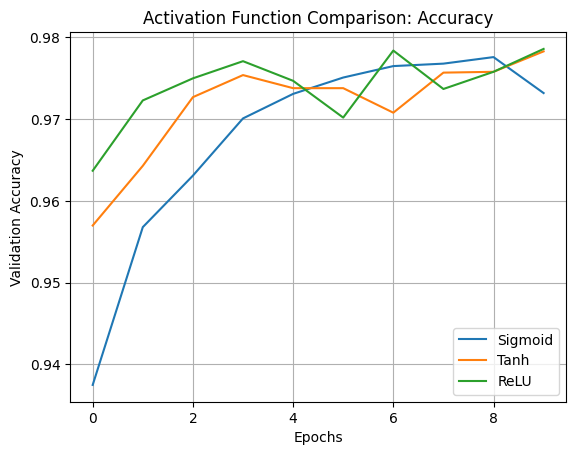

In [ ]:
# Plot accuracy comparison
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Activation Function Comparison: Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## **Explanation:**

* We plot accuracy over epochs to see how the models improve over time.
* The X-axis represents epochs (training cycles).
* The Y-axis represents validation accuracy.
* This will help us identify which activation function leads to the highest accuracy.

## **Step 6: Plot Loss Comparison**
**We now plot the validation loss to see how well the models minimize errors.**

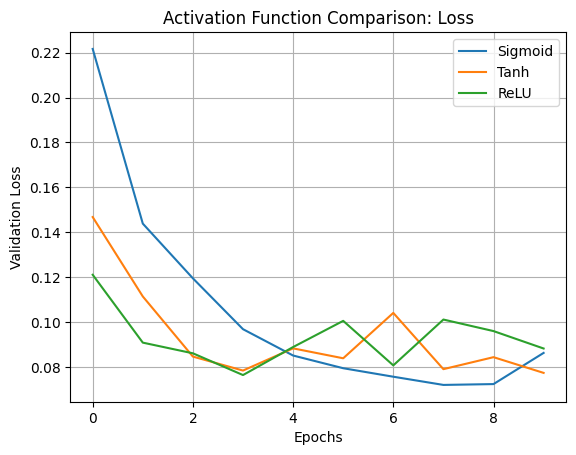

In [ ]:
# Plot loss comparison
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
plt.plot(history_tanh.history['val_loss'], label='Tanh')
plt.plot(history_relu.history['val_loss'], label='ReLU')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Activation Function Comparison: Loss')
plt.legend()
plt.grid(True)
plt.show()


## **Explanation:**

* Loss measures how far predictions are from the actual values.
* The goal is to minimize loss.
* If a model has a lower validation loss, it means it's learning better.


## **Step 7: Summary of Findings**
**We print the final accuracy for each activation function.**

In [ ]:
final_accuracy = {
    "Sigmoid": history_sigmoid.history['val_accuracy'][-1],
    "Tanh": history_tanh.history['val_accuracy'][-1],
    "ReLU": history_relu.history['val_accuracy'][-1]
}

print("Final Validation Accuracy:")
for activation, acc in final_accuracy.items():
    print(f"{activation}: {acc:.4f}")


Final Validation Accuracy:
Sigmoid: 0.9732
Tanh: 0.9783
ReLU: 0.9786


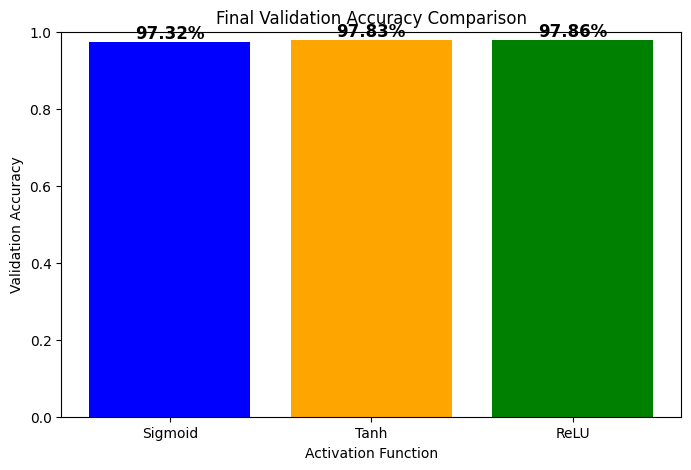

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(["Sigmoid", "Tanh", "ReLU"], comparison_df["Final Validation Accuracy"], color=['blue', 'orange', 'green'])

# Add percentage labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height()*100:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.title("Final Validation Accuracy Comparison")
plt.ylim(0, 1.0)  # Accuracy is between 0 and 1
plt.show()


## **Explanation:**

* We extract the last validation accuracy from the training history.
* We print the accuracy for each activation function.


---



---



## **Output Analysis & Observations**  

### **Training Time (Seconds)**  
- **Sigmoid:** 97.87s  
- **Tanh:** 103.33s  
- **ReLU:** 97.67s  

 **ReLU trains the fastest**, while **Tanh is the slowest** due to complex calculations.  
 **Sigmoid and Tanh suffer from vanishing gradients, slowing training.**  

### **Validation Accuracy (%)**  
- **Sigmoid:** 97.32%  
- **Tanh:** 97.83%  
- **ReLU:** 97.86%  

* **ReLU achieves the highest accuracy**, making it the best choice.  
* **Tanh is slightly better than Sigmoid, but slower in training.**  
* **Sigmoid performs the worst due to vanishing gradient issues.**  

### **Final Verdict**  
* **Use ReLU for deep learning—it’s fast and accurate!** 🚀  
* **Tanh is a decent alternative, but slower.**  
* **Avoid Sigmoid for hidden layers due to poor performance.**



---



---

